# **Project: Investigating TMDB Dataset**
By: Bassel Sherif

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

This dataset contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


---

## Questions:
*   Which genres are most popular over the years ?
*   What is the relation between profit and budget ?
*   What is the relation between release year and revenue ?
*   What is the relation between vote count and revenue ?
*   What are the highest and lowest revenues ?
*   What are the highest and lowest profits ?
*   What is the average runtime of movies ?

In [22]:
#importing packages
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pprint

<a id='wrangling'></a>
# **Data Wrangling**
This is where we assess and clean the dataset

## Assessing the data

In [23]:
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


From looking at the dataset we notice that some columns won't be needed like:<br>
id, imdb_id, homepage, tagline, overview, etc..

In [24]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

It is noticeable how some columns have missing/ NaN values:<br>
imdb_id, cast, homepage, director, tagline, keywords, overview, genres & production_companies

In [26]:
df.shape

(10866, 21)

In [27]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

## Data Cleaning
This is where we remove unused data, duplicates and NaN values so we can work with the data

### **1. Removing Unused Columns**

In [28]:
df.drop(['id','imdb_id','homepage','director','tagline','overview','keywords'], axis=1, inplace=True)

### **2. Removing Duplicates**

In [29]:
df.drop_duplicates(inplace=True)

### **3. Dropping entries with zero budget and revenue**

In [30]:
df[['budget','revenue']] = df[['budget','revenue']].replace(0, np.NAN)
df.dropna(subset = ['budget','revenue'], inplace = True)

###**4. Changing Budget & Revenue datatype from float to int**

In [31]:
df[['budget','revenue']]=df[['budget','revenue']].applymap(np.int64)

### **5. Changing Release Date to datetime format**

In [32]:
df['release_date'] = pd.to_datetime(df['release_date'])

###**6. Replacing zero with Nan in runtime column**

In [33]:
df['runtime'] = df['runtime'].replace(0, np.NAN)

###**7. Adding column that indicates if movie was profitable or not**

In [34]:
df['profit?'] = df['revenue'] > df['budget']
df['profit'] = df['revenue'] - df['budget']
df.columns

Index(['popularity', 'budget', 'revenue', 'original_title', 'cast', 'runtime',
       'genres', 'production_companies', 'release_date', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj', 'profit?',
       'profit'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

## **Research Question 1 (Most popular Genres ?)**

In [35]:
def count_each(column):
    separate = pd.Series(df[column].str.cat(sep = '|').split('|'))
    counted_data = separate.value_counts()
    return counted_data

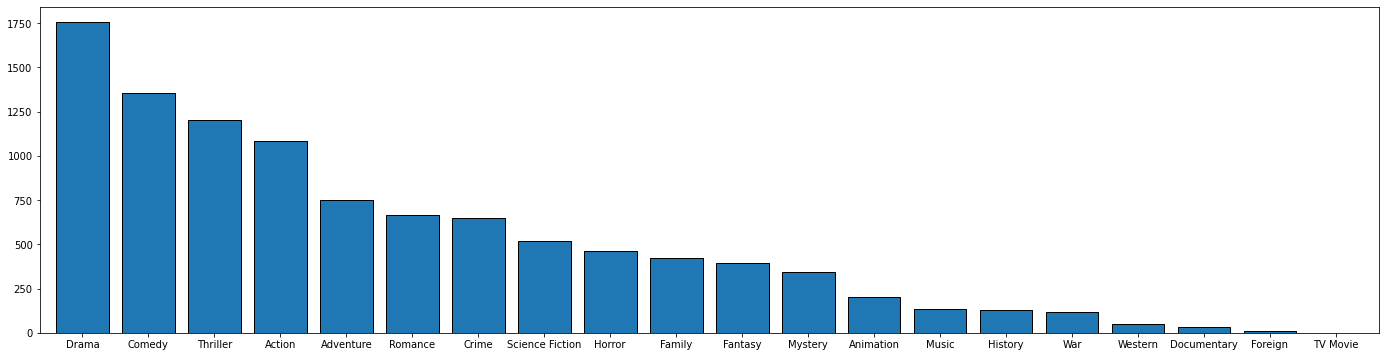

In [63]:
#count_each("genres").plot(kind='pie', figsize=(20,20), autopct="%1.1f%%")
count_each("genres").plot(kind='bar', edgecolor='black',figsize=(24,6), rot=0, width=0.8)

We can observe from the chart that "Drama" has been the most popular genre over the years followed by "Comedy"

## **Research Question 2  (What is the relation between budget and profit ?)**

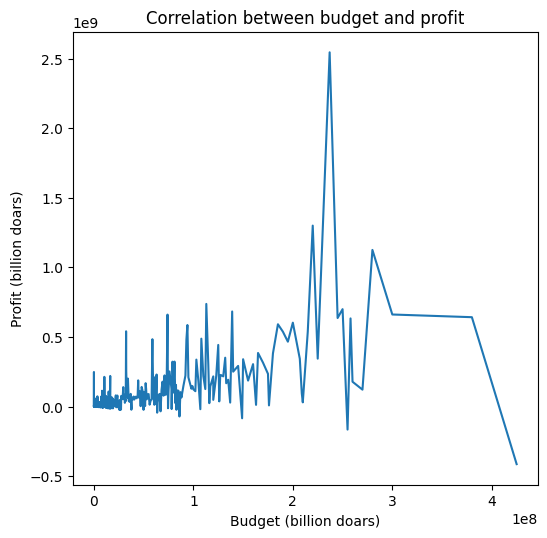

In [56]:
plt.figure(figsize=(6,6),dpi=100)
plt.plot(df.groupby('budget')['profit'].mean())

plt.title('Correlation between budget and profit')
plt.xlabel('Budget (billion doars)')
plt.ylabel('Profit (billion doars)');

Observing the graph, we can see that in some cases a very high budget did not equal high profit and sometimes it led to a loss.
Increasing the budget does not insure a higher revenue.

## **Research Question 3  (What is the relation between release year and revenue ?)**

Text(0.5, 1.0, 'Correlation between year of release and average revenue')

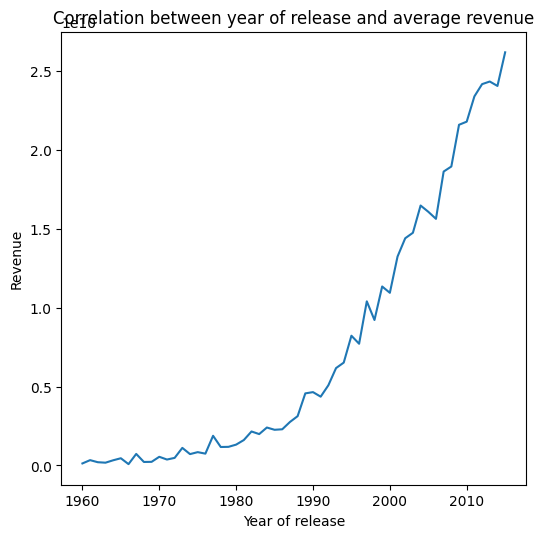

In [50]:
plt.figure(figsize=(6,6), dpi = 100)

plt.plot(df.groupby('release_year')['revenue'].sum())

plt.xlabel('Year of release')
plt.ylabel('Revenue')
plt.title('Correlation between year of release and average revenue')


Observing the graph, we can see that the average revenue made increases almost linearly along the years.

## **Research Question 4  (What is the relation between vote count and revenue ?)**

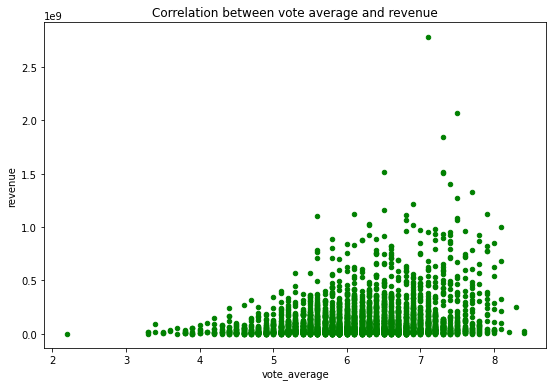

In [39]:
df.plot(kind='scatter',x='vote_average',y="revenue",color='green',figsize=(9,6),title ="Correlation between vote average and revenue" );

Observing the scatter plot, we can see that an increase in revenue does not necessarily equate to a high vote average.

## **Research Question 5  (What are the highest and lowest revenues ?)**

In [45]:
def calculate(column):
    # highest profit
    high = df[column].idxmax()
    high_detail = pd.DataFrame(df.loc[high])
    
    # lowest profit
    low = df[column].idxmin()
    low_detail = pd.DataFrame(df.loc[low])
    
    # collecting data together
    output = pd.concat([high_detail, low_detail], axis=1)
    
    return output

In [54]:
calculate('revenue')

,1386,5067
popularity,9.432768,0.462609
budget,237000000,6000000
revenue,2781505847,2
original_title,Avatar,Shattered Glass
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
runtime,162,94
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Lions Gate Films|Cruise/Wagner Productions|Bau...
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
vote_count,8458,46


we can observe that the highest revenue is 2,781,505,847 dollars<br>
and the lowest revenue is 2 dollars

## **Research Question 6  (What are the highest and lowest profits ?)**

In [42]:
calculate('profit')

,1386,2244
popularity,9.432768,0.25054
budget,237000000,425000000
revenue,2781505847,11087569
original_title,Avatar,The Warrior's Way
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
runtime,162,100
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
production_companies,Ingenious Film Partners|Twentieth Century Fox ...,Boram Entertainment Inc.
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
vote_count,8458,74


We can observe that the highest profit made was 2,544,505,847 dollars<br>
and the lowest profit was -413,912,431 which indicates a huge loss

## **Research Question 7  (What is the average runtime of movies ?)**

In [51]:
df['runtime'].mean()

109.22029060716139

(array([  1.,   1.,   1.,   0.,   0.,   4.,  35., 307., 924., 832., 637.,
        463., 275., 185.,  68.,  46.,  28.,  16.,  11.,  11.,   3.,   3.,
          1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   1.]),
 array([ 15.        ,  24.22857143,  33.45714286,  42.68571429,
         51.91428571,  61.14285714,  70.37142857,  79.6       ,
         88.82857143,  98.05714286, 107.28571429, 116.51428571,
        125.74285714, 134.97142857, 144.2       , 153.42857143,
        162.65714286, 171.88571429, 181.11428571, 190.34285714,
        199.57142857, 208.8       , 218.02857143, 227.25714286,
        236.48571429, 245.71428571, 254.94285714, 264.17142857,
        273.4       , 282.62857143, 291.85714286, 301.08571429,
        310.31428571, 319.54285714, 328.77142857, 338.        ]),
 <a list of 35 Patch objects>)

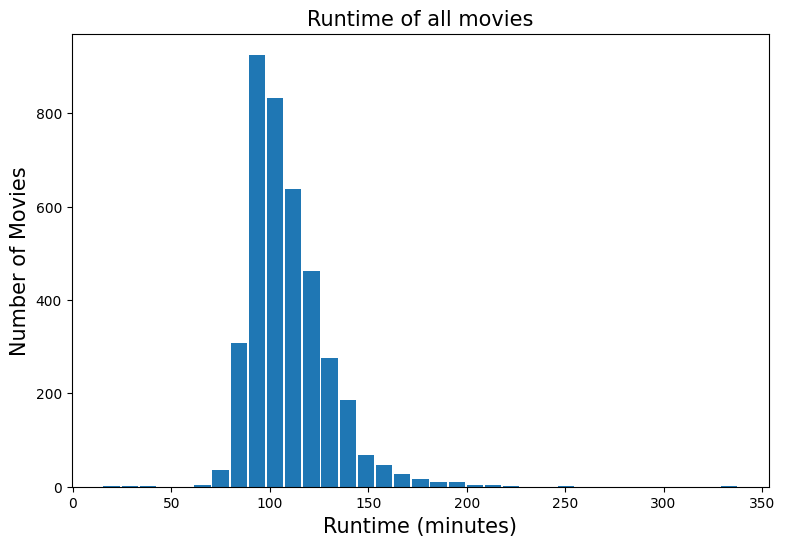

In [52]:
plt.figure(figsize=(9,6), dpi = 100)

plt.xlabel('Runtime (minutes)', fontsize = 15)
plt.ylabel('Number of Movies', fontsize=15)
plt.title('Runtime of all movies', fontsize=15)

plt.hist(df['runtime'], rwidth = 0.9, bins =35)

As observed, the runtime average is 109 minutes

<a id='conclusions'></a>
# **Conclusions**

*   The top 5 most popular genres of all time were:
    1.   Drama
    2.   Comedy
    3.   Thriller
    4.   Action
    5.   Adventure
*   Increasing budget does not always mean increased profit. although we can observe that there is a sweet spot for the budget where it has been shown to make more profit.
*   The average revenue made by a movie has been increasing linearly over the years.
*   High vote average does not necessarily mean huge revenue
*   the highest revenue is 2,781,505,847 dollars, and the lowest revenue is 2 dollars
*   the highest profit made was 2,544,505,847 dollars, and the lowest profit was -413,912,431 which indicates a huge loss
*   Average runtime of a movie is 109 minutes
*   Outliers were a problem which needs to be addressed in the preprocessing step